In [1]:
pip install pytesseract

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract\tesseract.exe'

NameError: name 'pytesseract' is not defined

In [3]:
pip install tesseract-ocr

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Admin\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-a9kxkmvg\\tesseract-ocr_d4f385cef3584bd0ab3dad7ed1796d83\\setup.py'"'"'; __file__='"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-a9kxkmvg\\tesseract-ocr_d4f385cef3584bd0ab3dad7ed1796d83\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Admin\AppData\Local\Temp\pip-wheel-xbv908gt'
       cwd: C:\Users\Admin\AppData\Local\Temp\pip-install-a9kxkmvg\tesseract-ocr_d4f385cef3584bd0ab3dad7ed1796d83\
  Complete output (10 lines):
  C:\Users\Admin\anaconda3\lib\site-packages\setuptools\dist.py:717: UserWarning: Usage of dash-


  Using cached tesseract-ocr-0.0.1.tar.gz (33 kB)
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
    Running setup.py install for tesseract-ocr: started
    Running setup.py install for tesseract-ocr: finished with status 'error'


In [4]:
pip install tesseract

Note: you may need to restart the kernel to use updated packages.


In [5]:
#pip install tesseract-ocr

In [6]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Loading the required python modules
import pytesseract # this is tesseract module
import matplotlib.pyplot as plt
import cv2 # this is opencv module
import glob
import os

In [8]:
# specify path to the license plate images folder as shown below
path_for_license_plates = os.getcwd() + "C:/Users/Admin/Downloads/imge/vckkk.jpg"
list_license_plates = []
predicted_license_plates = []

for path_to_license_plate in glob.glob(path_for_license_plates, recursive = True):
	
	license_plate_file = path_to_license_plate.split("/")[-1]
	license_plate, _ = os.path.splitext(license_plate_file)
	'''
	Here we append the actual license plate to a list
	'''
	list_license_plates.append(license_plate)
	
	'''
	Read each license plate image file using openCV
	'''
	img = cv2.imread(path_to_license_plate)
	
	'''
	We then pass each license plate image file
	to the Tesseract OCR engine using the Python library
	wrapper for it. We get back predicted_result for
	license plate. We append the predicted_result in a
	list and compare it with the original the license plate
	'''
	predicted_result = pytesseract.image_to_string(img, lang ='eng',
	config ='--oem 3 --psm 6 -c tessedit_char_whitelist = ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
	
	filter_predicted_result = "".join(predicted_result.split()).replace(":", "").replace("-", "")
	predicted_license_plates.append(filter_predicted_result)


In [9]:
print("Actual License Plate", "\t", "Predicted License Plate", "\t", "Accuracy")
print("--------------------", "\t", "-----------------------", "\t", "--------")

def calculate_predicted_accuracy(actual_list, predicted_list):
	for actual_plate, predict_plate in zip(actual_list, predicted_list):
		accuracy = "0 %"
		num_matches = 0
		if actual_plate == predict_plate:
			accuracy = "100 %"
		else:
			if len(actual_plate) == len(predict_plate):
				for a, p in zip(actual_plate, predict_plate):
					if a == p:
						num_matches += 1
				accuracy = str(round((num_matches / len(actual_plate)), 2) * 100)
				accuracy += "%"
		print("	 ", actual_plate, "\t\t\t", predict_plate, "\t\t ", accuracy)

		
calculate_predicted_accuracy(list_license_plates, predicted_license_plates)


Actual License Plate 	 Predicted License Plate 	 Accuracy
-------------------- 	 ----------------------- 	 --------


Text(0.5, 1.0, 'GWT2180 license plate')

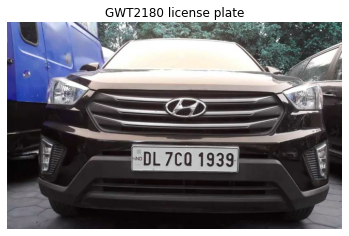

In [10]:
# Read the license plate file and display it
test_license_plate = cv2.imread(os.getcwd() + "/vckkk.jpg")
plt.imshow(test_license_plate)
plt.axis('off')
plt.title('GWT2180 license plate')

In [16]:
pytesseract.pytesseract.tesseract_cmd=r'tesseract-ocr-setup-4.00.00dev.exe'

In [17]:
resize_test_license_plate = cv2.resize(
    test_license_plate, None, fx = 2, fy = 2, 
    interpolation = cv2.INTER_CUBIC)

In [18]:
grayscale_resize_test_license_plate = cv2.cvtColor(
	resize_test_license_plate, cv2.COLOR_BGR2GRAY)


In [19]:
gaussian_blur_license_plate = cv2.GaussianBlur(
	grayscale_resize_test_license_plate, (5, 5), 0)


In [20]:
new_predicted_result_GWT2180 = pytesseract.image_to_string(gaussian_blur_license_plate, lang ='eng',
config ='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist = ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
filter_new_predicted_result_GWT2180 = "".join(new_predicted_result_GWT2180.split()).replace(":", "").replace("-", "")
print(filter_new_predicted_result_GWT2180)


TesseractNotFoundError: tesseract-ocr-setup-4.00.00dev.exe is not installed or it's not in your PATH. See README file for more information.

In [21]:
import cv2
import sys
import pytesseract

# Read the image file
image = cv2.imread('C:/Users/Admin/Downloads/imge/car0.jpg')
# Convert to Grayscale Image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Canny Edge Detection
canny_edge = cv2.Canny(gray_image, 170, 200)

# Find contours based on Edges
contours, new  = cv2.findContours(canny_edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours=sorted(contours, key = cv2.contourArea, reverse = True)[:30]

# Initialize license Plate contour and x,y coordinates
contour_with_license_plate = None
license_plate = None
x = None
y = None
w = None
h = None

# Find the contour with 4 potential corners and creat ROI around it
for contour in contours:
        # Find Perimeter of contour and it should be a closed contour
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.01 * perimeter, True)
        if len(approx) == 4: #see whether it is a Rect
            contour_with_license_plate = approx
            x, y, w, h = cv2.boundingRect(contour)
            license_plate = gray_image[y:y + h, x:x + w]
            break

# Removing Noise from the detected image, before sending to Tesseract
license_plate = cv2.bilateralFilter(license_plate, 11, 17, 17)
(thresh, license_plate) = cv2.threshold(license_plate, 150, 180, cv2.THRESH_BINARY)

#Text Recognition
text = pytesseract.image_to_string(license_plate)
#Draw License Plate and write the Text
image = cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 3) 
image = cv2.putText(image, text, (x-100,y-50), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,255,0), 6, cv2.LINE_AA)

print("License Plate :", text)

cv2.imshow("License Plate Detection",image)
cv2.waitKey(0)

TesseractNotFoundError: tesseract-ocr-setup-4.00.00dev.exe is not installed or it's not in your PATH. See README file for more information.

In [22]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract\tesseract.exe'